### **Phase 3: Two Approaches for Team Differentiation** 📊

#### **K-Means Clustering** 🧠

In [1]:
from kmeansclassifier import kmeansclassifier

In [2]:
video_path = "/Users/alyazouzou/Desktop/CV_Football/vids/good.mov"
classifier = kmeansclassifier(video_path, model_path="/Users/alyazouzou/Desktop/CV_Football/FootCVision/phase1/runs/detect/train/weights/best.pt") 

Extracting player crops: 0it [00:00, ?it/s]


0: 384x640 3 players, 65.6ms
Speed: 2.4ms preprocess, 65.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 players, 62.4ms
Speed: 1.4ms preprocess, 62.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 players, 85.1ms
Speed: 1.4ms preprocess, 85.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 players, 59.5ms
Speed: 1.8ms preprocess, 59.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 players, 55.9ms
Speed: 1.3ms preprocess, 55.9ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 players, 54.8ms
Speed: 1.4ms preprocess, 54.8ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 player, 55.0ms
Speed: 1.5ms preprocess, 55.0ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 players, 52.8ms
Speed: 1.2ms preprocess, 52.8ms inference, 0.3ms postprocess per image at shape (1

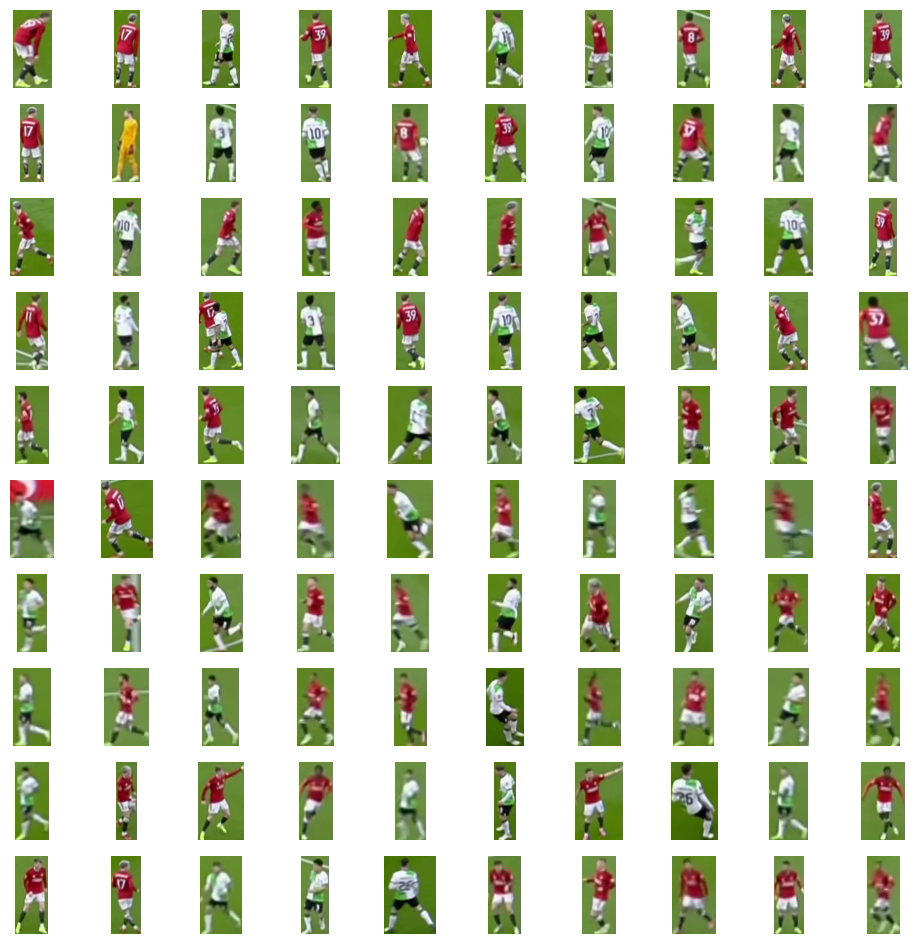

In [3]:
crops = classifier.get_crops_from_frames(stride=150, player_id=2)
classifier.plot_crops(crops)

In [4]:
# Extract CLIP features
features = classifier.get_features(crops)

Extracting embeddings: 0it [00:00, ?it/s]

In [5]:
# Train KMeans on features
classifier.train_kmeans(features)
# Then use predicted clusters separately
clusters = classifier.predict_clusters(features)

🔄 Entraînement de KMeans...
✅ KMeans entraîné avec succès !


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


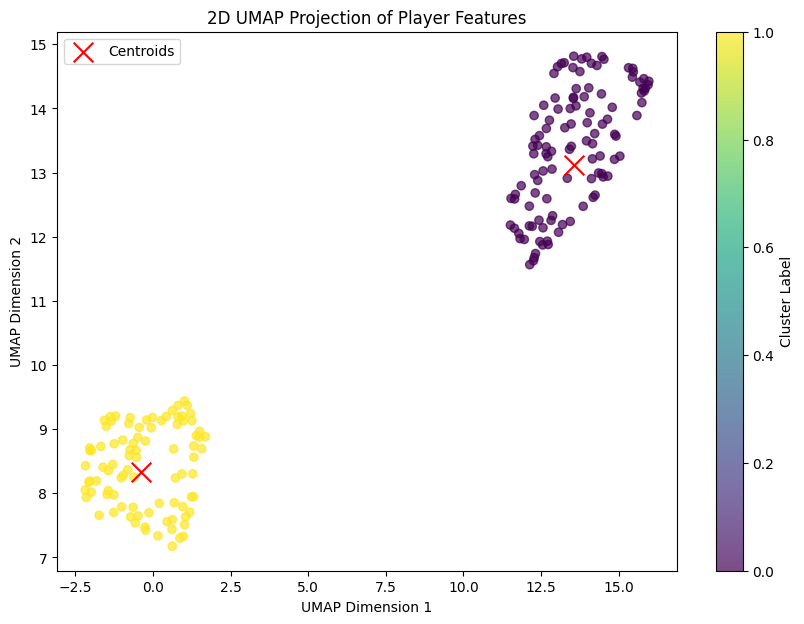

In [6]:
projection_2d = classifier.projection_umap(features, n_components=2)
classifier.plot_projection(projection_2d, clusters)

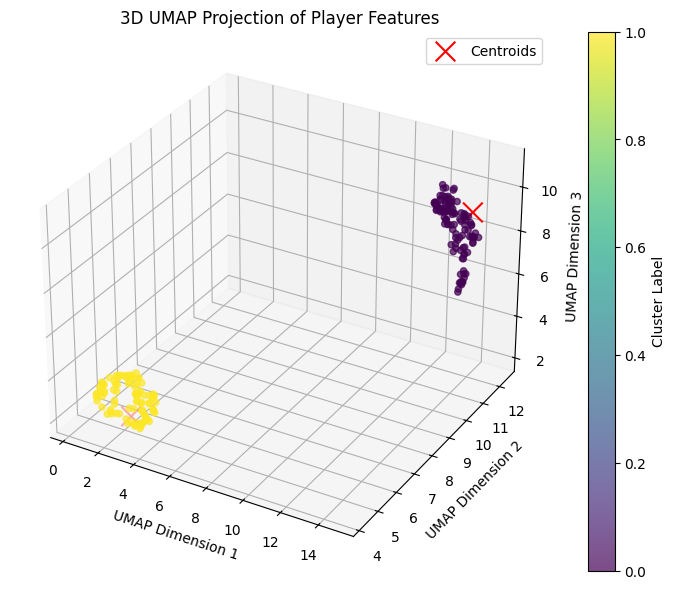

In [7]:
projection_3d = classifier.projection_umap(features, n_components=3)
classifier.plot_projection_3d(projection_3d, clusters)

📊 Evaluating KMeans with 2 clusters
Variance intra-cluster: 511.81332
Variance inter-cluster: 11862.758834838867
🔹 Silhouette Score: 0.1815 (Higher is better)
📊 Ratio de Séparation: 23.18


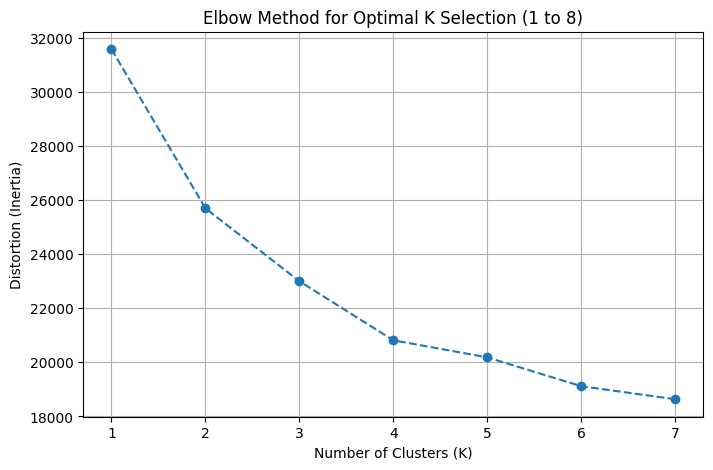

✅ Evaluation completed.


In [8]:
classifier.evaluate()

#### **HSV Classifier** 🎥

In [1]:
from hsvclassifier import HSVClassifier

Extracting player crops: 0it [00:00, ?it/s]


0: 384x640 3 players, 70.6ms
Speed: 4.3ms preprocess, 70.6ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 players, 56.1ms
Speed: 1.7ms preprocess, 56.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 players, 56.2ms
Speed: 1.5ms preprocess, 56.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 players, 56.4ms
Speed: 1.3ms preprocess, 56.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 players, 61.9ms
Speed: 2.4ms preprocess, 61.9ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 players, 55.7ms
Speed: 2.4ms preprocess, 55.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 players, 60.1ms
Speed: 1.2ms preprocess, 60.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 players, 57.9ms
Speed: 1.3ms preprocess, 57.9ms inference, 0.4ms postprocess per image at shape (

<Figure size 800x800 with 0 Axes>

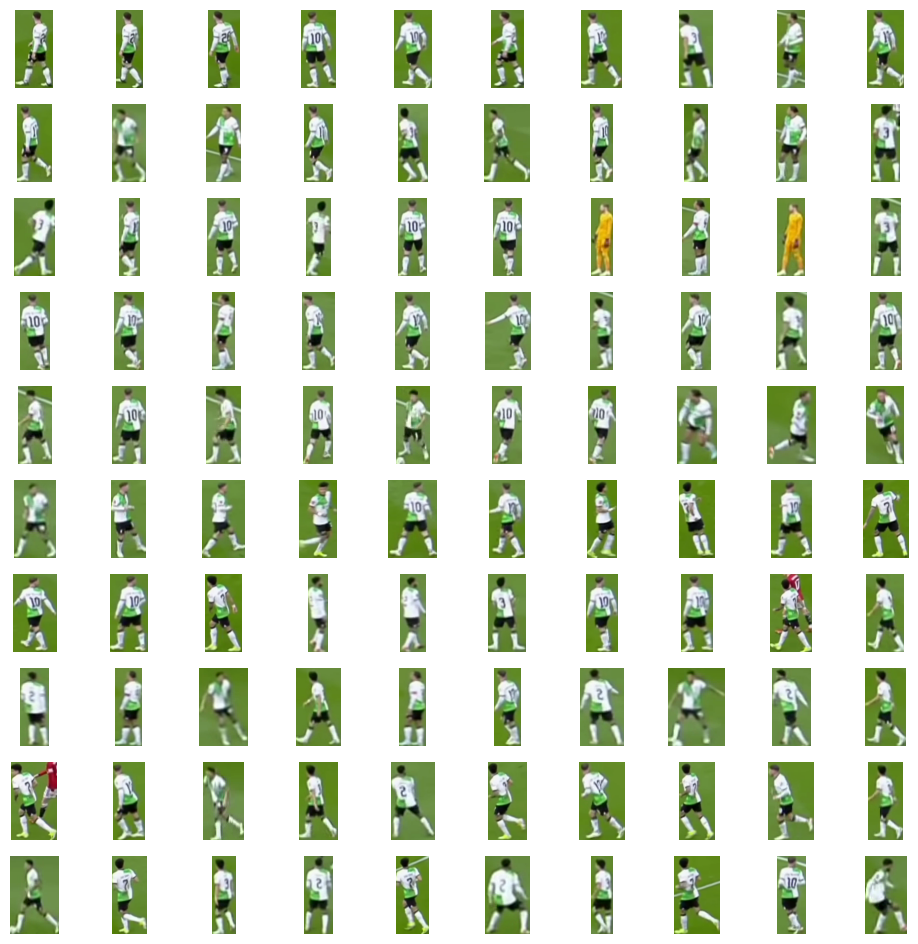

<Figure size 800x800 with 0 Axes>

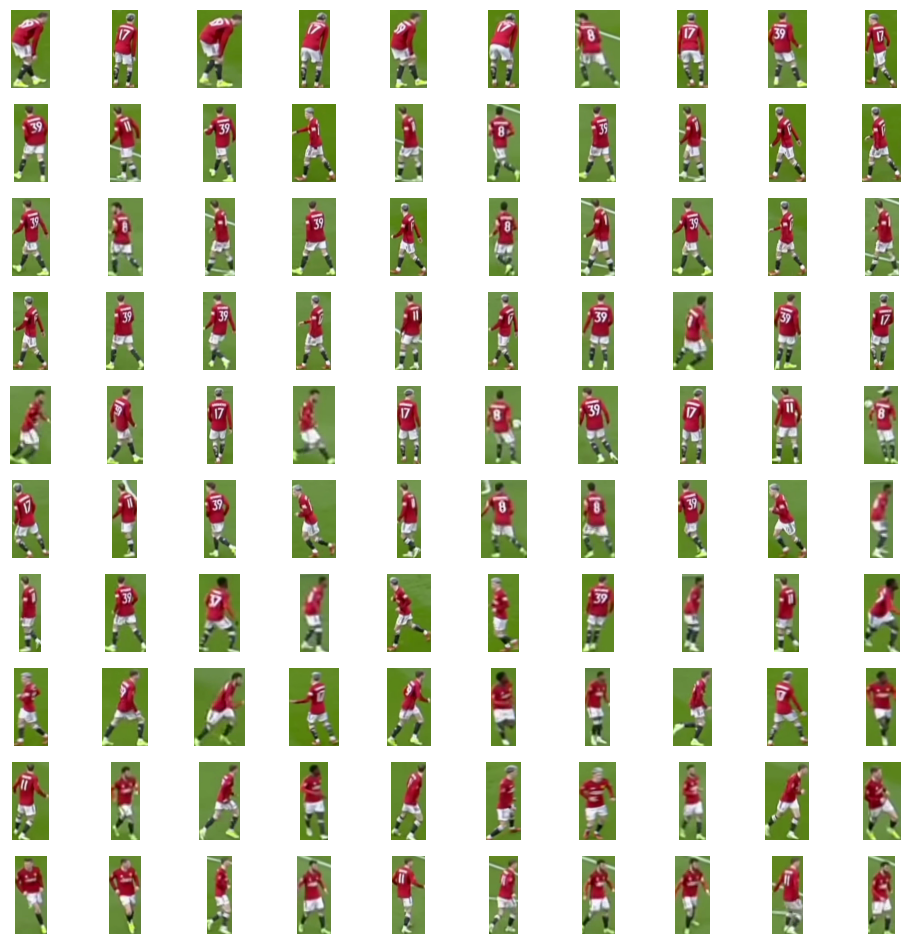

In [2]:
video_path = "/Users/alyazouzou/Desktop/CV_Football/vids/good.mov"
classifier = HSVClassifier(video_path, model_path="/Users/alyazouzou/Desktop/CV_Football/FootCVision/phase1/runs/detect/train/weights/best.pt")

results = classifier.predict(stride=30) 
classifier.plot_classified_crops(results)

#### **Visualisation des plages HSV**

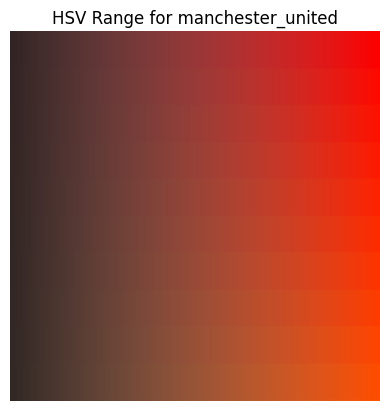

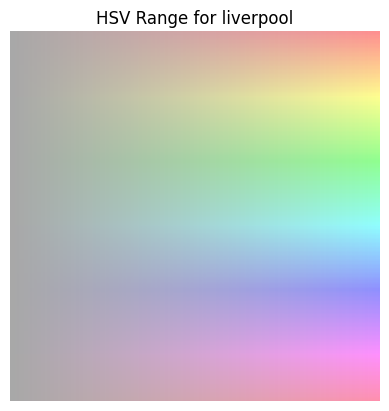

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cv2

# HSV range dictionary
color_ranges = {
    "manchester_united": [(0, 70, 50), (10, 255, 255)],  # red
    "liverpool": [(0, 0, 168), (172, 111, 255)]   # white
}

# Function to create a gradient image for an HSV range
def plot_hsv_range(hsv_range, label):
    # Generate a gradient of HSV values within the range
    h_range = np.linspace(hsv_range[0][0], hsv_range[1][0], 256)
    s_range = np.linspace(hsv_range[0][1], hsv_range[1][1], 256)
    v_range = np.linspace(hsv_range[0][2], hsv_range[1][2], 256)
    
    # Create a meshgrid of HSV values
    hsv_image = np.zeros((256, 256, 3), dtype=np.uint8)
    for i in range(256):
        hsv_image[i, :, 0] = h_range[i]  # Hue
        hsv_image[:, i, 1] = s_range[i]  # Saturation
        hsv_image[:, i, 2] = v_range[i]  # Value

    # Convert the HSV image to RGB using OpenCV
    rgb_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)

    # Plotting
    plt.imshow(rgb_image)
    plt.title(f"HSV Range for {label}")
    plt.axis("off")
    plt.show()

# Plot the HSV ranges for Manchester United and Liverpool
for team, hsv_range in color_ranges.items():
    plot_hsv_range(hsv_range, team)
